# Classificando Roupas para um Suposta Loja

Vamos classificar dessa suposta loja de roupa de treino:
https://github.com/zalandoresearch/fashion-mnist



## Importando e identificando os elementos do código

In [21]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
plt.rc('figure', figsize = (20,10))

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste,identificacoes_teste)) = dataset.load_data()
print(imagens_treino.shape, imagens_teste.shape)
print(len(identificacoes_treino), len(identificacoes_teste))
# Tudo certo

(60000, 28, 28) (10000, 28, 28)
60000 10000


Text(0.5, 1.0, '9')

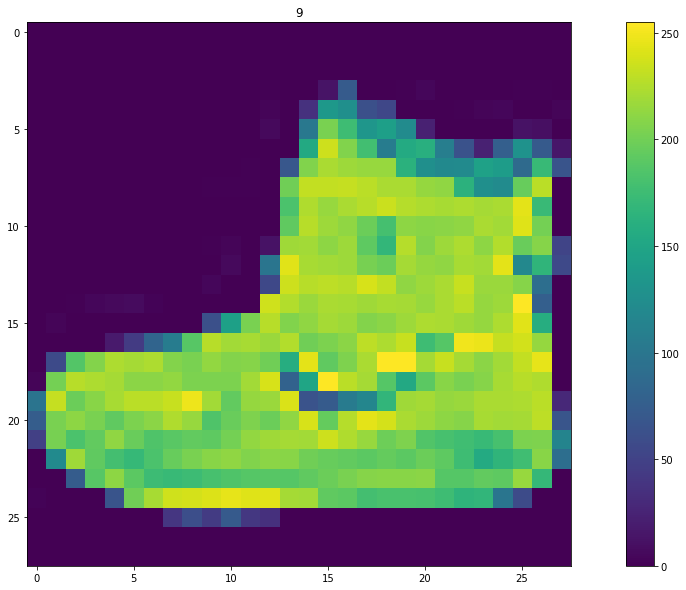

In [3]:
plt.imshow(imagens_treino[0])
plt.colorbar() # MUITOS tons de cor...
plt.title(identificacoes_treino[0]) # retornou um número 9... ?

0
9


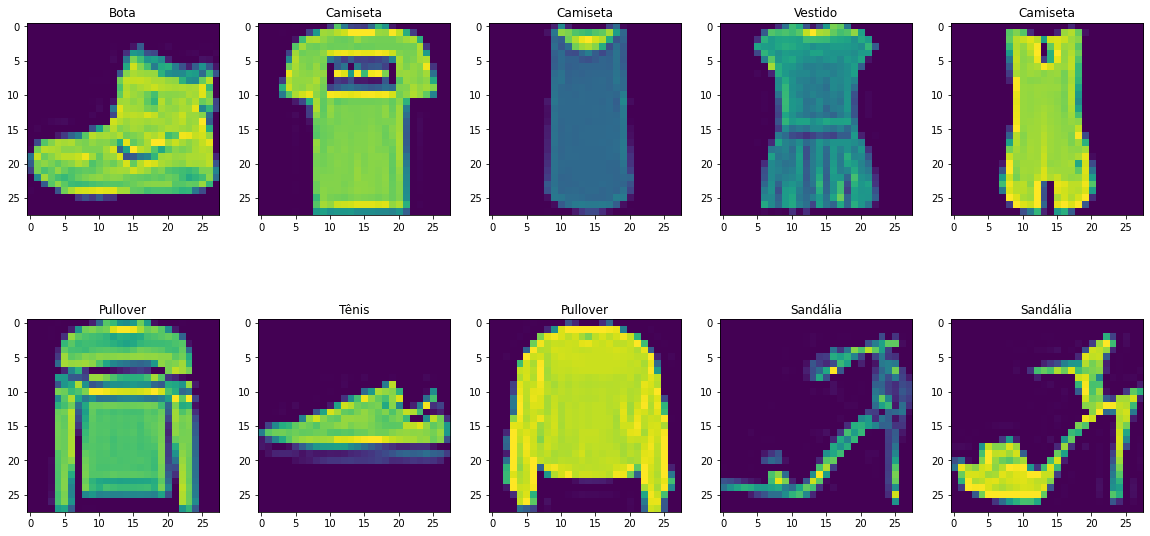

In [4]:
print(identificacoes_treino.min())
print(identificacoes_treino.max())
# 10 posições
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

## Aplicando o Modelo

In [5]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu), # Melhor colocar múltiplos de dois e o relU é uma função matemática
    keras.layers.Dense(total_de_classificacoes, activation = tensorflow.nn.softmax)
])
# Aqui temos duas camadas, já que a primeira é a 0, algumas pessoas dizem que para que se possa considerar deep learning tem que
# existir mais camadas.

# É necessário compilar o modelo...
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy') # Otimizador mais indicado para mais de duas categorias
modelo.fit(imagens_treino, identificacoes_treino)


1875/1875 [==============================] - 16s 8ms/step - loss: 3.7668


Tentando corrigir as cores

Resultado: A loss cai MUITO

In [6]:
# Normalização
imagens_treino = imagens_treino/255.0 # Isso reescala as cores em floats para que os números fiquem menores

In [7]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu), # Melhor colocar múltiplos de dois e o relU é uma função matemática
    keras.layers.Dense(total_de_classificacoes, activation = tensorflow.nn.softmax)
])
# Aqui temos duas camadas, já que a primeira é a 0, algumas pessoas dizem que para que se possa considerar deep learning tem que
# existir mais camadas.

# É necessário compilar o modelo...
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy') # Otimizador mais indicado para mais de duas categorias
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4826


Vamos adicionais mais camadas, as chamadas camadas ocultas para ver o que acontece...

In [8]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu), # Melhor colocar múltiplos de dois e o relU é uma função matemática
    keras.layers.Dense(128, activation = tensorflow.nn.relu), # Não se sabe o que acontece aqui
    keras.layers.Dense(64, activation = tensorflow.nn.relu),
    keras.layers.Dense(total_de_classificacoes, activation = tensorflow.nn.softmax)
])
# Aqui temos duas camadas, já que a primeira é a 0, algumas pessoas dizem que para que se possa considerar deep learning tem que
# existir mais camadas.

# É necessário compilar o modelo...
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy') # Otimizador mais indicado para mais de duas categorias
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 9s 5ms/step - loss: 0.4903


Neste modelo, não vale a pena deixar com tantas camadas, já que a loss aumenta e demora mais

Vamos treinar mais vezes

In [16]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu), # Melhor colocar múltiplos de dois e o relU é uma função matemática
    keras.layers.Dense(total_de_classificacoes, activation = tensorflow.nn.softmax)
])
# Aqui temos duas camadas, já que a primeira é a 0, algumas pessoas dizem que para que se possa considerar deep learning tem que
# existir mais camadas.

# É necessário compilar o modelo...
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy']) # Otimizador mais indicado para mais de duas categorias
modelo.fit(imagens_treino, identificacoes_treino, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4866 - accuracy: 0.8279
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3645 - accuracy: 0.8669
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3254 - accuracy: 0.8810
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3034 - accuracy: 0.8875
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2833 - accuracy: 0.8955


In [18]:
predicao = modelo.predict(imagens_teste)

313/313 [==============================] - 1s 3ms/step


In [65]:
# Para saber se erramos ou acertamos precisamos achar o maior valor
print(f'Resultado do teste: {np.argmax(predicao[2])}')
print(f'Gabarito: {identificacoes_teste[2]}')

Resultado do teste: 1
Gabarito: 1


In [71]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print(f'A perda do teste foi: {perda_teste:.2f} e a acurácia do teste foi de {acuracia_teste * 100:.2f}%')

313/313 [==============================] - 2s 5ms/step - loss: 52.1364 - accuracy: 0.8622
A perda do teste foi: 52.14 e a acurácia do teste foi de 86.22%


In [73]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu), # Melhor colocar múltiplos de dois e o relU é uma função matemática
    keras.layers.Dense(total_de_classificacoes, activation = tensorflow.nn.softmax)
])
# Aqui temos duas camadas, já que a primeira é a 0, algumas pessoas dizem que para que se possa considerar deep learning tem que
# existir mais camadas.

# É necessário compilar o modelo...
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy']) # Otimizador mais indicado para mais de duas categorias
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4978 - accuracy: 0.8236 - val_loss: 0.4015 - val_accuracy: 0.8545
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3724 - accuracy: 0.8652 - val_loss: 0.3692 - val_accuracy: 0.8719
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3347 - accuracy: 0.8770 - val_loss: 0.3363 - val_accuracy: 0.8787
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3091 - accuracy: 0.8859 - val_loss: 0.3191 - val_accuracy: 0.8839
Epoch 5/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2927 - accuracy: 0.8913 - val_loss: 0.3344 - val_accuracy: 0.8777


Text(0.5, 1.0, 'Acurácia por épocas')

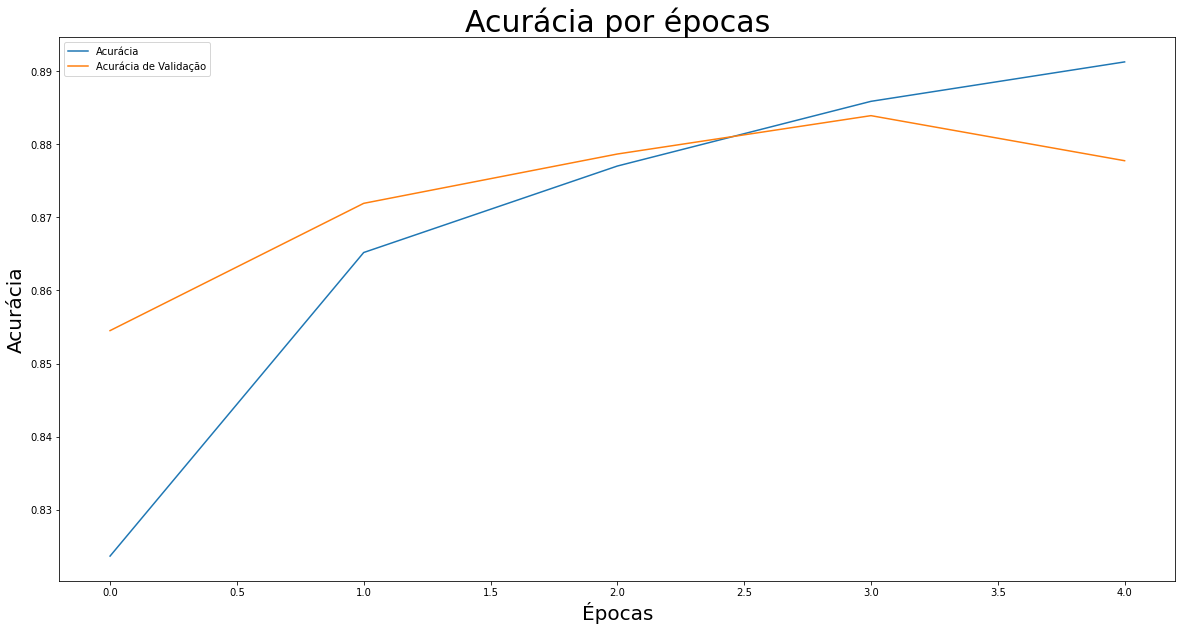

In [87]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['Acurácia', 'Acurácia de Validação'])
plt.xlabel('Épocas', fontsize = 20)
plt.ylabel('Acurácia', fontsize = 20)
plt.title('Acurácia por épocas', fontsize = 30)

Text(0.5, 1.0, 'Perda por épocas')

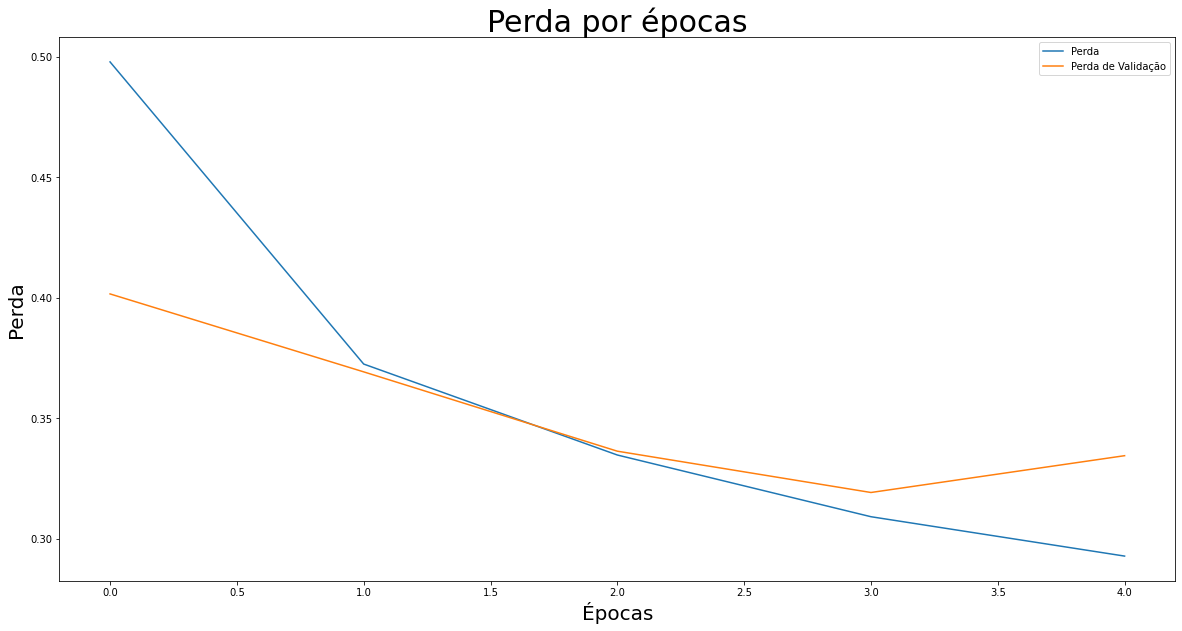

In [88]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['Perda', 'Perda de Validação'])
plt.xlabel('Épocas', fontsize = 20)
plt.ylabel('Perda', fontsize = 20)
plt.title('Perda por épocas', fontsize = 30)

## Agora, iremos fazer mais épocas para ver se o resultado melhora

Claramente um Overfitting

In [90]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu), # Melhor colocar múltiplos de dois e o relU é uma função matemática
    keras.layers.Dense(total_de_classificacoes, activation = tensorflow.nn.softmax)
])
# Aqui temos duas camadas, já que a primeira é a 0, algumas pessoas dizem que para que se possa considerar deep learning tem que
# existir mais camadas.

# É necessário compilar o modelo...
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy']) # Otimizador mais indicado para mais de duas categorias
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 10, validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5006 - accuracy: 0.8236 - val_loss: 0.3896 - val_accuracy: 0.8633
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3763 - accuracy: 0.8648 - val_loss: 0.3599 - val_accuracy: 0.8704
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3358 - accuracy: 0.8769 - val_loss: 0.3353 - val_accuracy: 0.8801
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3108 - accuracy: 0.8851 - val_loss: 0.3309 - val_accuracy: 0.8803
Epoch 5/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2911 - accuracy: 0.8909 - val_loss: 0.3346 - val_accuracy: 0.8826
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2756 - accuracy: 0.8979 - val_loss: 0.3347 - val_accuracy: 0.8823
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2627 - accuracy: 0.9022 - val_loss: 0.3274 - val_accurac

Text(0.5, 1.0, 'Acurácia por épocas')

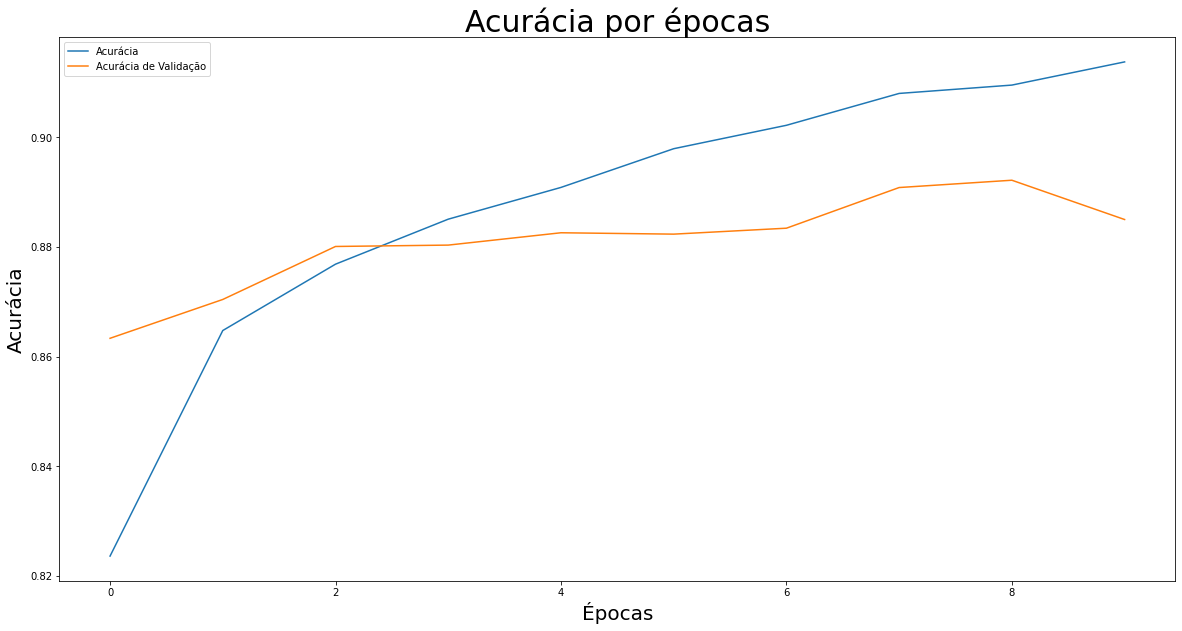

In [91]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['Acurácia', 'Acurácia de Validação'])
plt.xlabel('Épocas', fontsize = 20)
plt.ylabel('Acurácia', fontsize = 20)
plt.title('Acurácia por épocas', fontsize = 30)

Text(0.5, 1.0, 'Perda por épocas')

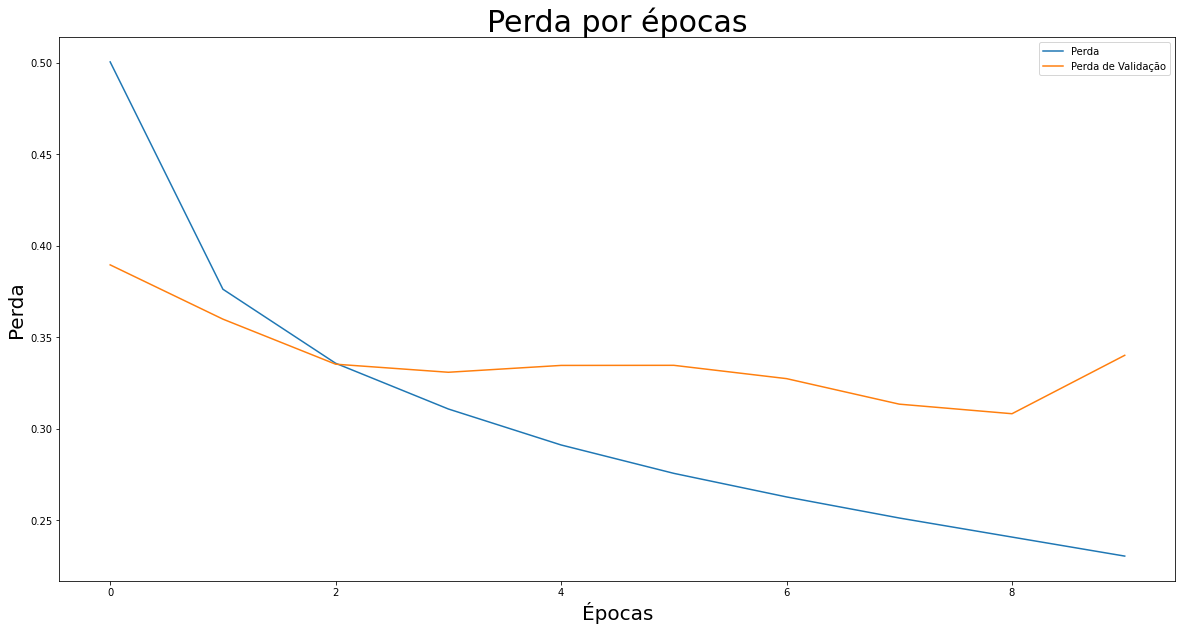

In [92]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['Perda', 'Perda de Validação'])
plt.xlabel('Épocas', fontsize = 20)
plt.ylabel('Perda', fontsize = 20)
plt.title('Perda por épocas', fontsize = 30)

## Resolvendo o Overfitting

Melhorou bastante

In [93]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu), # Melhor colocar múltiplos de dois e o relU é uma função matemática
    keras.layers.Dropout(0.2), # Deixa alguns nódulos meio "adormecidos" tende a diminuir o overfitting
    keras.layers.Dense(total_de_classificacoes, activation = tensorflow.nn.softmax)
])
# Aqui temos duas camadas, já que a primeira é a 0, algumas pessoas dizem que para que se possa considerar deep learning tem que
# existir mais camadas.

# É necessário compilar o modelo...
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy']) # Otimizador mais indicado para mais de duas categorias
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5275 - accuracy: 0.8120 - val_loss: 0.4051 - val_accuracy: 0.8521
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3966 - accuracy: 0.8553 - val_loss: 0.3853 - val_accuracy: 0.8599
Epoch 3/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3609 - accuracy: 0.8685 - val_loss: 0.3764 - val_accuracy: 0.8622
Epoch 4/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3429 - accuracy: 0.8728 - val_loss: 0.3453 - val_accuracy: 0.8735
Epoch 5/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3225 - accuracy: 0.8811 - val_loss: 0.3406 - val_accuracy: 0.8767


Text(0.5, 1.0, 'Acurácia por épocas')

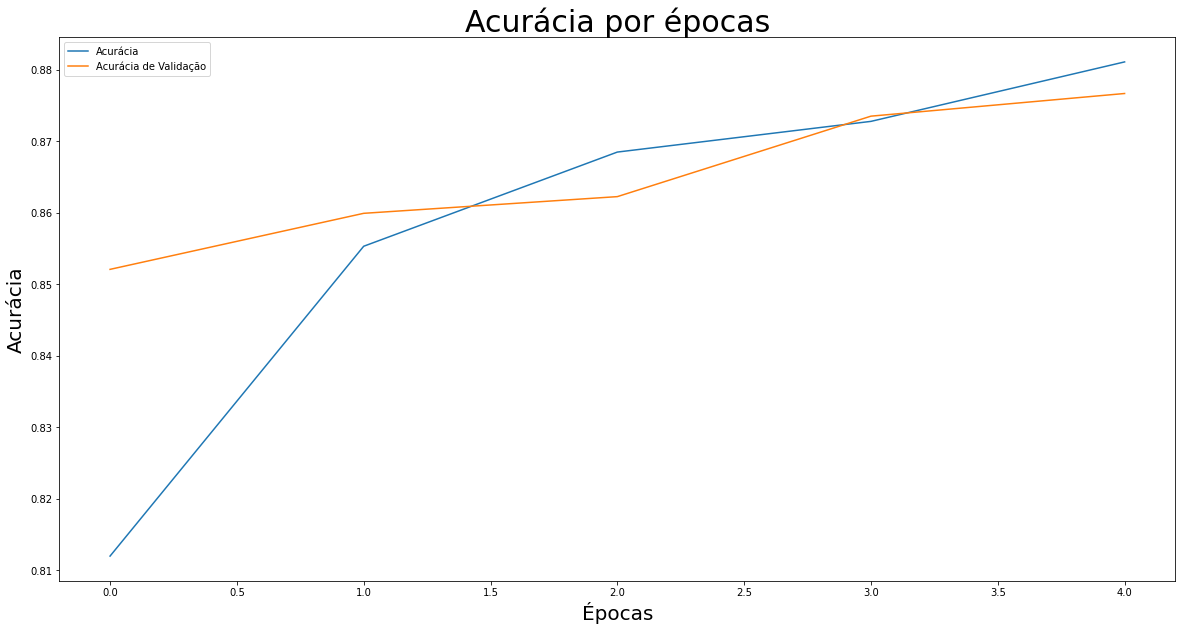

In [94]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['Acurácia', 'Acurácia de Validação'])
plt.xlabel('Épocas', fontsize = 20)
plt.ylabel('Acurácia', fontsize = 20)
plt.title('Acurácia por épocas', fontsize = 30)

Text(0.5, 1.0, 'Perda por épocas')

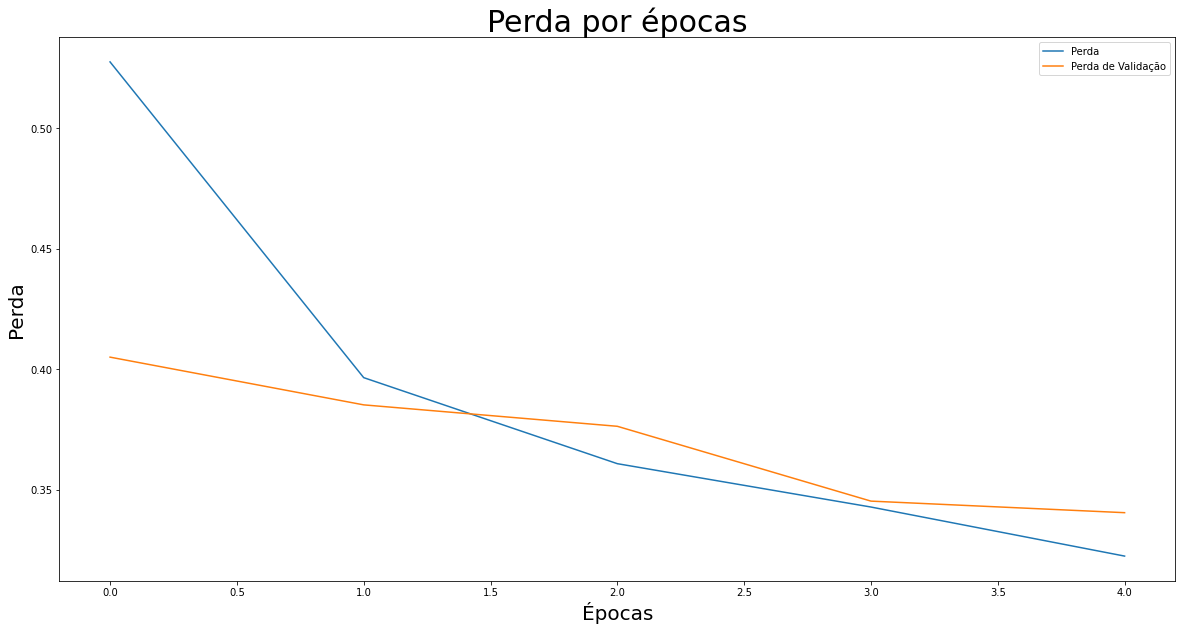

In [95]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['Perda', 'Perda de Validação'])
plt.xlabel('Épocas', fontsize = 20)
plt.ylabel('Perda', fontsize = 20)
plt.title('Perda por épocas', fontsize = 30)

In [100]:
from tensorflow.keras.models import load_model
modelo.save('modelo.h5')

In [101]:
modelo_salvo = load_model('modelo.h5')
# Serve para resgatar um modelo anteriormente feito, mas não usarei neste arquivo

## Organizando o melhor código e sintetizando

In [9]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
plt.rc('figure', figsize = (20,10))

In [10]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste,identificacoes_teste)) = dataset.load_data()

In [12]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 3.0613 - accuracy: 0.6251 - val_loss: 0.8159 - val_accuracy: 0.6977
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8946 - accuracy: 0.6741 - val_loss: 0.6946 - val_accuracy: 0.7306
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.8016 - accuracy: 0.7021 - val_loss: 0.6945 - val_accuracy: 0.7570
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7695 - accuracy: 0.7146 - val_loss: 0.6071 - val_accuracy: 0.7860
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7502 - accuracy: 0.7240 - val_loss: 0.6023 - val_accuracy: 0.7744


In [14]:
predicoes = modelo.predict(imagens_teste)
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print(f'A perda do teste: {perda_teste:.2f} e a acurácia foi de: {acuracia_teste * 100:.2f}%')

313/313 [==============================] - 0s 1ms/step - loss: 0.6192 - accuracy: 0.7610
A perda do teste: 0.62 e a acurácia foi de: 76.10%
